<a href="https://colab.research.google.com/github/scadriano/lia1_2025_2/blob/main/Aula%2007%20-%20Projeto%20ponta%20a%20ponta%20-%20Tensor%20Flow/Vis%C3%A3o_Computacional_Construindo_um_modelo_com_TensorFlow_Cifar10ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='Blue'>Projeto Ponta a Ponta - Construindo um Modelo com TensorFlow</font>

Construir um modelo de Inteligência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem. <font color='red'>Lembrando: uma imagem é uma matriz de pixels!</font>

Conheça o TensorFlow! -> https://www.tensorflow.org/

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão do Python neste Notebook:', python_version())

Versão do Python neste Notebook: 3.12.11


In [ ]:
# Instala o TF
#!pip install -q tensorflow==2.12
!pip install -q tensorflow

In [ ]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

## Carregando os dados - matéria prima

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
# Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-processamento e Visualização das imagens

In [ ]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [ ]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

In [ ]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

## Construção do Modelo

In [ ]:
# Arquitetura do Modelo -> Feature Learning

from tensorflow.keras import models, layers

modelo_lia = models.Sequential()

# Camada de entrada
modelo_lia.add(layers.Input(shape=(32, 32, 3)))

# Blocos convolucionais + pooling
modelo_lia.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

modelo_lia.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

modelo_lia.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# Sumário do modelo
modelo_lia.summary()

In [ ]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

In [ ]:
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 2,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3438 - loss: 1.7749 - val_accuracy: 0.5698 - val_loss: 1.1954
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5808 - loss: 1.1866 - val_accuracy: 0.6289 - val_loss: 1.0629
CPU times: user 18.5 s, sys: 2.07 s, total: 20.5 s
Wall time: 21.9 s


## Avaliação do modelo

In [ ]:
# Avalia o modelo
erro_teste, acc_teste = modelo_lia.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 1s - 2ms/step - accuracy: 0.6289 - loss: 1.0629


In [ ]:
print('\nAcurácia com dados de Teste:', acc_teste)


Acurácia com dados de Teste: 0.6288999915122986


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


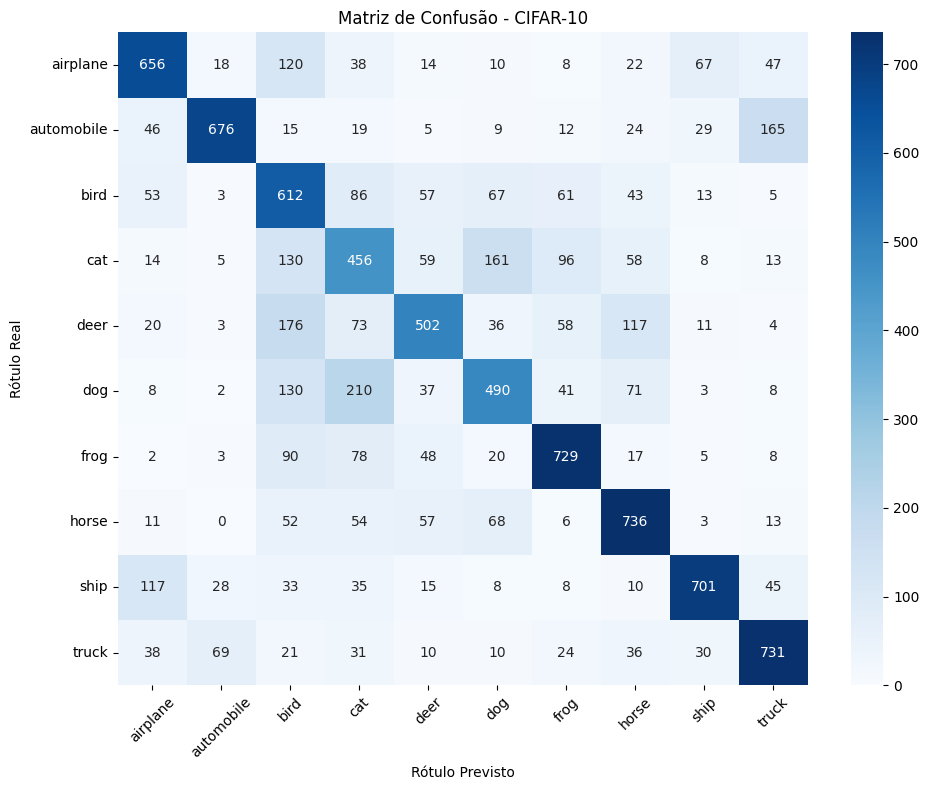

In [ ]:
# Imprime a matriz de confusão
from sklearn.metrics import confusion_matrix

# Previsão do modelo
y_pred = modelo_lia.predict(imagens_teste)
y_pred_classes = np.argmax(y_pred, axis=1)

# Labels já estão no formato inteiro, então podemos usá-las diretamente
y_true = labels_teste.flatten()  # Caso labels_teste tenha shape (10000, 1)

# Geração da matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Impressão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nomes_classes,
            yticklabels=nomes_classes)
plt.title('Matriz de Confusão - CIFAR-10')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Deploy do modelo

In [ ]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/Image3.png")

In [ ]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1024, 1536)

In [ ]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [ ]:
print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

A largura da imagem é:  1024
A altura da imagem é:  1536


In [ ]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

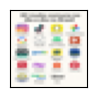

In [ ]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [ ]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [ ]:
# Previsões
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
print(previsoes)

[[0.10033084 0.14747928 0.04238559 0.30049977 0.05889821 0.0948134
  0.07256979 0.04056402 0.06757037 0.07488867]]


In [ ]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [ ]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: cat


Se você chegou até aqui, parabéns! 🎆 🔥